<a href="https://colab.research.google.com/github/bezerraluis/Churn--Project/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set

Find a copy on :[Kaggle](https://www.kaggle.com/shrutimechlearn/churn-modelling)

### Description

RowNumber - Row Numbers from 1 to 10000

CustomerId - Unique Ids for bank customer identification  

Surname - Customer's last name

CreditScore -  Credit score of the customer

Geography - The country from which the customer belongs

Gender -  Male or Female

Age - Age of the customer

Tenure - Number of years for which the customer has been with the bank

Balance - Bank balance of the customer

NumOfProducts - Number of bank products the customer is utilising


# Hypotheses 

Customers with lower scores tend to leave the bank.

The country is decisive for the client to leave the bank

There are more men than women who leave the bank.

Younger customer has a tendency to leave the bank

Customers with up to 2 years as a customer usually leave the bank.

Customers who do not have a credit card tend to leave the bank.





# Business Problem

Decreasing the number of churns is something that the entire company needs to pursue. It is essential for the growth and health of any operation.

How to project growth, attract investors if customer retention fails within organizations.

When a user churns, and this is repeated with other people, a very large alert signal needs to be turned on.

And a question must be answered: what are we doing wrong?

Customers talk to each other. Information is accessible to all. Therefore, working to have an ever lower churn, close to zero, is a tireless pursuit.

More than that. Understanding the (especially financial) impact of this metric is vital. It is what will maintain financial health and a safer hike for any business.

## Business Goal

 This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
Our Objective is to predict if a customer stay o leave the bank, creating a predictive model with only the necessary variables to not make it too complex.

# Frameworks

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Loading and viewing data

In [2]:
df_churn= pd.read_csv('/content/drive/My Drive/Todos os arquivos do pc antigo/datasets Kaggle/churn.csv')

In [3]:
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



We do not have missing values

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning

### Row Number

In [5]:
df_churn['RowNumber'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

As we can see RowNumber is just a line identifier so it has no predictive power and we will delete it

In [6]:
df_churn2 = df_churn.drop('RowNumber',axis= 1)

## CustomerId

In [7]:
df_churn['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

The same goes to CustomerID

In [8]:
df_churn2 = df_churn.drop('CustomerId',axis= 1)

## Surname   

In [9]:
df_churn['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

There is no relation between churn and Surname, we are drop it.


In [10]:
df_churn2 = df_churn.drop('Surname',axis= 1)

## CreditScore  

We have a good distribution of the data. A standard deviation of 96 and 75 percent of the data is between 584 and 718

In [11]:
df_churn2['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Here we can better visualize our distribution and our quartiles

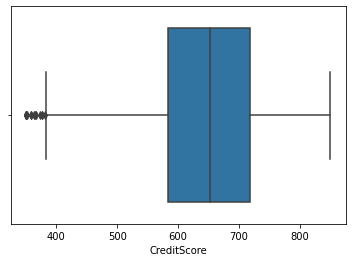

In [12]:
sns.boxplot(df_churn2['CreditScore'])

We have a distribution very close to a normal curve.

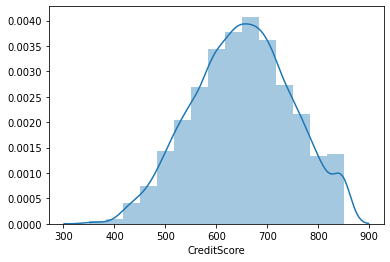

In [13]:
sns.distplot(df_churn2['CreditScore'], bins= 15)

## Geography   

We do not have misspelled words

In [14]:
df_churn2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Gender 

We do not have misspelled words

In [15]:
df_churn2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Age 

In [16]:
df_churn2['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

We have a good distribution of the data. A standard deviation of 10 and 75 percent of the data is between 32 and 44 



In [17]:
df_churn2['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

We can see that we have data from 60 years old, which can be outliers in our distribution.

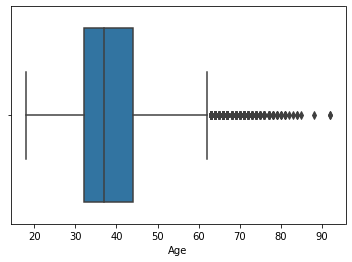

In [18]:
sns.boxplot(df_churn2['Age'])

We can see that our distribution is approaching a normal distribution and that data from 60 is pulling the tail to the right

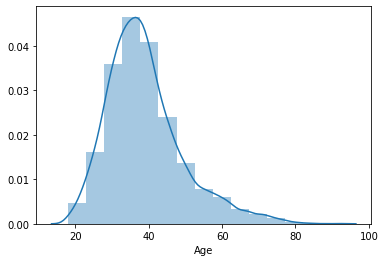

In [19]:
sns.distplot(df_churn2['Age'], bins= 15)

## Tenure 

In [20]:
df_churn2['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

We do not have a problem with our data the standard deviation is low ,our data is distributed between 0 to 10 and the quartiles are ok.

In [21]:
df_churn2['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

We do not have outliers

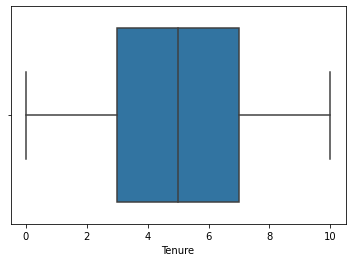

In [22]:
sns.boxplot(df_churn2['Tenure'])

We do not have a normal distribution.


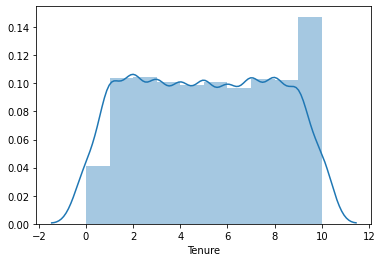

In [23]:
sns.distplot(df_churn2['Tenure'],bins=10)

## Balance

In [24]:
df_churn2['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

We have customers with 0 on the account and 250898 max and most of the customers have between 0 to 127644


In [25]:
df_churn2['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

We do not have outliers

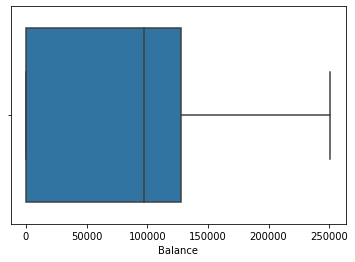

In [26]:
sns.boxplot(df_churn2['Balance'])

We do not have a normal distribution , coustomers with 0 balance are skewing our data.

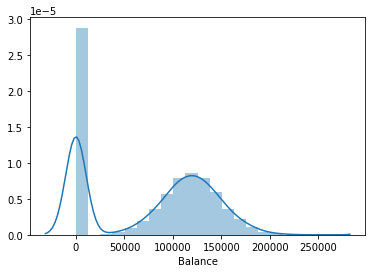

In [27]:
sns.distplot(df_churn2['Balance'],bins=20)

In [28]:
df_churn2['NumOfProducts'].unique()

array([1, 3, 2, 4])

We have a good value of standard deviation of 0.58 showing our data is not too dispersed from the mean.

In [29]:
df_churn2['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

We have a value of 4 that might be a outlier

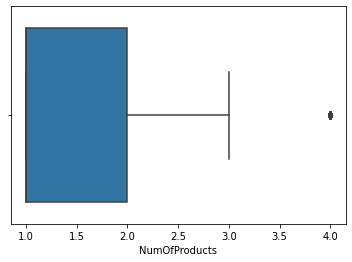

In [30]:
sns.boxplot(df_churn2['NumOfProducts'])

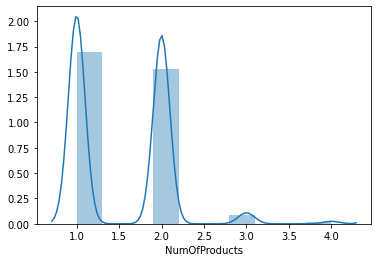

In [31]:
sns.distplot(df_churn2['NumOfProducts'], bins= 10)

### HasCrCard  

We only have 0 and 1 

In [32]:
df_churn2['HasCrCard'].unique()

array([1, 0])

### EstimatedSalary 

Most of our data is 51000 and 149388 and our data is a bit dispersed std of 57510

In [33]:
df_churn2['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

We do not have any outliers

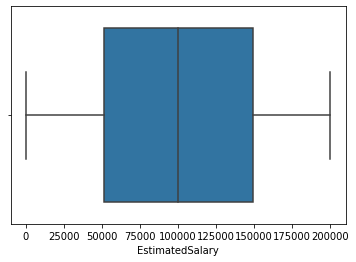

In [34]:
sns.boxplot(df_churn2['EstimatedSalary'])

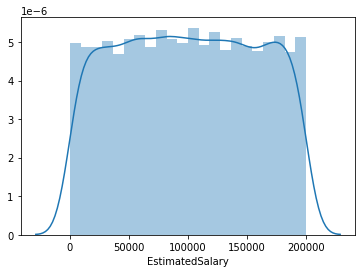

In [35]:
sns.distplot(df_churn2['EstimatedSalary'])

### Exited  

In [36]:
df_churn2['Exited'].unique()

array([1, 0])

# Exploratory Data Analysis

## checking the classes

In [37]:
exited = df_churn2['Exited'].value_counts() # 1 - leave
                                            # 0 - stay
exited

0    7963
1    2037
Name: Exited, dtype: int64

Almost 80 % of the customers closed account 

In [38]:
stay = (exited[0] / len(df_churn2))*100

stay



79.63

We have  unbalanced classes on our data set 

In [39]:
leave = (exited[1] / len(df_churn2))*100

leave

20.369999999999997

## Checking the Hypotheses

Customers with lower scores tend to leave the bank.

The country is decisive for the client to leave the bank

There are more men than women who leave the bank.

Younger customer has a tendency to leave the bank

Customers with up to 2 years as a customer usually leave the bank.

Customers who do not have a credit card tend to leave the bank.

### Customers with lower scores tend to leave the bank.

In [53]:
less_than = df_churn2.query('CreditScore <=500')

In [70]:
count = less_than['Exited'].value_counts()

count

0    491
1    152
Name: Exited, dtype: int64

In [83]:
porc_leave = (count[1] / len(df_churn2))*100

print(round(porc_leave),'%')

2.0 %


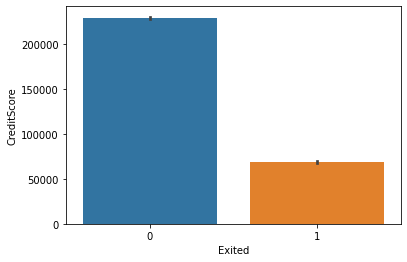

In [77]:
sns.barplot(y= 'CreditScore', x= 'Exited', data= less_than,estimator=np.sum)

In [54]:
more_than = df_churn2.query('CreditScore >500')

In [74]:
counts =more_than['Exited'].value_counts()

counts

0    7472
1    1885
Name: Exited, dtype: int64

In [82]:
porc_leave_more = (counts[1] / len(df_churn2))*100

print(round(porc_leave_more) ,'%')

19.0 %


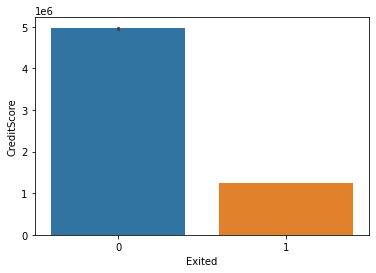

In [78]:
sns.barplot(y= 'CreditScore', x= 'Exited', data= more_than,estimator=np.sum)

###The country is decisive for the client to leave the bank

In [96]:
df_churn2.groupby('Geography')['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

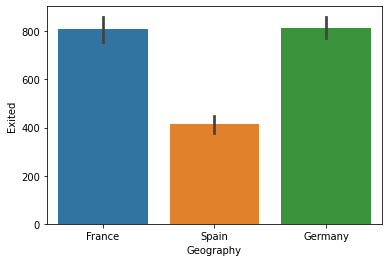

In [110]:
sns.barplot(x= 'Geography',y= 'Exited',data= df_churn2,estimator= np.sum)

### There are more men than women who leave the bank

In [111]:
df_churn2.groupby('Gender')['Exited'].sum()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

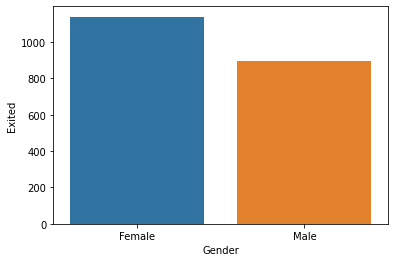

In [113]:
sns.barplot(x= 'Gender', y= 'Exited', data= df_churn2,ci= None ,estimator= np.sum)

### Younger customer has a tendency to leave the bank

In [125]:
Age_btw_20 = df_churn2.query('Age <= 20')

In [126]:
Age_btw_20_40 = df_churn2.query('Age >20 & Age <=40')

In [127]:
Age_btw_40_60 = df_churn2.query('Age >40 & Age <=60')

In [128]:
Age_btw_60_80 = df_churn2.query('Age > 60 & Age <=80')

In [129]:
Age_high_80 = df_churn2.query('Age > 80')